In [1]:
!pip install pandas scikit-learn matplotlib seaborn tqdm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from tqdm import tqdm
import seaborn as sns
from joblib import dump

In [3]:
%matplotlib inline

In [5]:
# Update the local folder path where we have stored your dataset files
folder_path = 'dataset'
file_paths = glob.glob(folder_path + '/*.csv')


In [6]:
df = pd.DataFrame()
for file_path in tqdm(file_paths, desc='Processing files', unit='file'):
    dff = pd.read_csv(file_path)
    df = pd.concat([df, dff], ignore_index=True)

# Display the first few rows of the DataFrame
df.head()

Processing files: 100%|██████████████████████████████████████████████████████████████| 35/35 [02:21<00:00,  4.05s/file]


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [5]:
# Display basic information about the DataFrame
print(df.shape)


(8706783, 47)


In [6]:
print(df.head())


   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000          54.00           6.00     64.00     0.329807   
1       0.000000          57.04           6.33     64.00     4.290556   
2       0.000000           0.00           1.00     64.00    33.396799   
3       0.328175       76175.00          17.00     64.00  4642.133010   
4       0.117320         101.73           6.11     65.91     6.202211   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0     0.329807    0.0              1.0              0.0              1.0  ...   
1     4.290556    0.0              0.0              0.0              0.0  ...   
2    33.396799    0.0              0.0              0.0              0.0  ...   
3  4642.133010    0.0              0.0              0.0              0.0  ...   
4     6.202211    0.0              0.0              1.0              0.0  ...   

         Std  Tot size           IAT  Number   Magnitue     Radius  \
0   

In [7]:
#printing features
print(df.keys())


Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')


In [8]:
#memory usage and the T.number of entries
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706783 entries, 0 to 8706782
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [9]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

In [10]:
print(df['label'].nunique())

34


In [11]:
print(df['label'].unique())

['DDoS-RSTFINFlood' 'DoS-TCP_Flood' 'DDoS-ICMP_Flood' 'DoS-UDP_Flood'
 'DoS-SYN_Flood' 'Mirai-greeth_flood' 'DDoS-SynonymousIP_Flood'
 'Mirai-udpplain' 'DDoS-SYN_Flood' 'DDoS-PSHACK_Flood' 'DDoS-TCP_Flood'
 'DDoS-UDP_Flood' 'BenignTraffic' 'MITM-ArpSpoofing'
 'DDoS-ACK_Fragmentation' 'Mirai-greip_flood' 'DoS-HTTP_Flood'
 'DDoS-ICMP_Fragmentation' 'Recon-PortScan' 'DNS_Spoofing'
 'DDoS-UDP_Fragmentation' 'Recon-OSScan' 'XSS' 'DDoS-HTTP_Flood'
 'Recon-HostDiscovery' 'CommandInjection' 'VulnerabilityScan'
 'DDoS-SlowLoris' 'Backdoor_Malware' 'BrowserHijacking'
 'DictionaryBruteForce' 'SqlInjection' 'Recon-PingSweep'
 'Uploading_Attack']


In [12]:
df['label'].value_counts()

label
DDoS-ICMP_Flood            1343257
DDoS-UDP_Flood             1010641
DDoS-TCP_Flood              839446
DDoS-PSHACK_Flood           763443
DDoS-SYN_Flood              757328
DDoS-RSTFINFlood            753657
DDoS-SynonymousIP_Flood     669686
DoS-UDP_Flood               618696
DoS-TCP_Flood               498357
DoS-SYN_Flood               376975
BenignTraffic               205116
Mirai-greeth_flood          184361
Mirai-udpplain              166386
Mirai-greip_flood           140681
DDoS-ICMP_Fragmentation      84273
MITM-ArpSpoofing             57612
DDoS-UDP_Fragmentation       53846
DDoS-ACK_Fragmentation       53402
DNS_Spoofing                 33527
Recon-HostDiscovery          24900
Recon-OSScan                 18297
Recon-PortScan               15264
DoS-HTTP_Flood               13448
VulnerabilityScan             6978
DDoS-HTTP_Flood               5406
DDoS-SlowLoris                4432
DictionaryBruteForce          2399
BrowserHijacking              1062
SqlInjection  

In [13]:
mapping = {
    'DDoS-ICMP_Flood': 1,
    'DDoS-UDP_Flood': 1,
    'DDoS-TCP_Flood': 1,
    'DDoS-PSHACK_Flood': 1,
    'DDoS-SYN_Flood': 1,
    'DDoS-RSTFINFlood': 1,
    'DDoS-SynonymousIP_Flood': 1,
    'DoS-UDP_Flood': 1,
    'DoS-TCP_Flood': 1,
    'DoS-SYN_Flood': 1,
    'BenignTraffic': 0,
    'Mirai-greeth_flood': 1,
    'Mirai-udpplain': 1,
    'Mirai-greip_flood': 1,
    'DDoS-ICMP_Fragmentation': 1,
    'MITM-ArpSpoofing': 1,
    'DDoS-UDP_Fragmentation': 1,
    'DDoS-ACK_Fragmentation': 1,
    'DNS_Spoofing': 1,
    'Recon-HostDiscovery': 1,
    'Recon-OSScan': 1,
    'Recon-PortScan': 1,
    'DoS-HTTP_Flood': 1,
    'VulnerabilityScan': 1,
    'DDoS-HTTP_Flood': 1,
    'DDoS-SlowLoris': 1,
    'DictionaryBruteForce': 1,
    'BrowserHijacking': 1,
    'CommandInjection': 1,
    'SqlInjection': 1,
    'XSS': 1,
    'Backdoor_Malware': 1,
    'Recon-PingSweep': 1,
    'Uploading_Attack': 1}

In [14]:
df['label'] = df['label'].map(mapping)

In [15]:
df['label'].value_counts()

label
1    8501667
0     205116
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706783 entries, 0 to 8706782
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [17]:
predictorNames = ['flow_duration', 'Header_Length', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']

In [18]:
predictors = df[predictorNames]

In [19]:
response = df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

In [21]:
# **Boosting Algorithm**
template = DecisionTreeClassifier(max_depth=5)

In [22]:
classificationEnsemble = AdaBoostClassifier(estimator=template,
                                             n_estimators=100,
                                             learning_rate=0.1)


In [24]:
# Training AdaBoostClassifier...
classificationEnsemble.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=100)

In [25]:
# Predictions on the test set
print("Making predictions on the test set...")
y_pred = classificationEnsemble.predict(X_test)

Making predictions on the test set...


In [26]:
# Evaluate the model
Accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [27]:
print('Accuracy:', Accuracy*100)
print('Recall:', recall*100)
print('Precision:', precision*100)
print('F1 Score:', f1*100)

Accuracy: 99.73721643522839
Recall: 99.8123943247813
Precision: 99.91840199791471
F1 Score: 99.865370029415


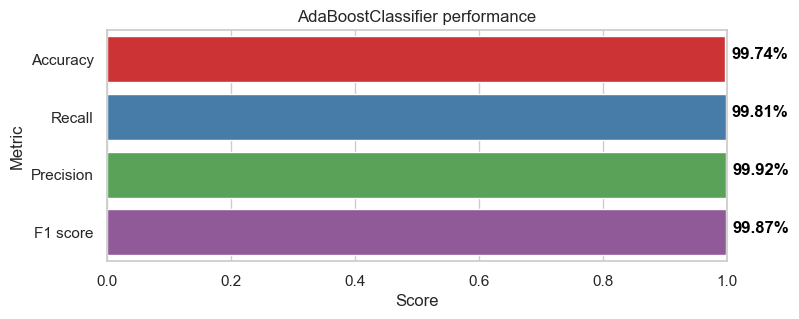

In [28]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score']
scores = [Accuracy,recall, precision,f1]
sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 3)) 


sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v+0.01, i, f'{v*100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title('AdaBoostClassifier performance')

plt.show()

In [29]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  39596    1386]
 [   3190 1697185]]


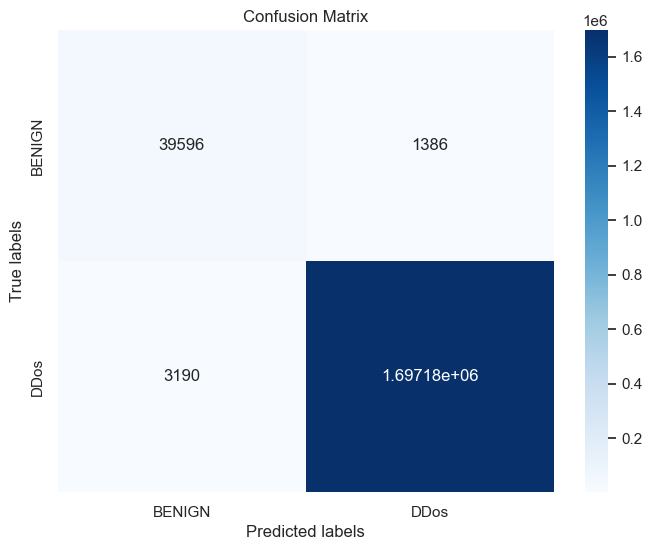

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['BENIGN', 'DDos'], yticklabels=['BENIGN', 'DDos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Save the trained model to a file
model_filename = 'adaboost_model.joblib'
dump(classificationEnsemble, model_filename)

['adaboost_model.joblib']

In [ ]:
# for model prediction
from joblib import load

loaded_model = load(model_filename)

# loaded_model for making predictions
new_predictions = loaded_model.predict(new_data)